# **Credit Score Classification Model**

**About the dataset**

*Problem Statement*

You are working as a data scientist in a global finance company. Over the years, the company has collected basic bank details and gathered a lot of credit-related information. The management wants to build an intelligent system to segregate the people into credit score brackets to reduce the manual efforts.

*Task*

Given a person’s credit-related information, build a machine learning model that can classify the credit score.

Below are all the features in the dataset based on the credit score classification dataset submitted by Rohan Paris on Kaggle:

*ID: Unique ID of the record*

*Customer_ID: Unique ID of the customer*

*Month: Month of the year*

*Name: The name of the person*

*Age: The age of the person*

*SSN: Social Security Number of the person*

*Occupation: The occupation of the person*

*Annual_Income: The Annual Income of the person*

*Monthly_Inhand_Salary: Monthly in-hand salary of the person*

*Num_Bank_Accounts: The number of bank accounts of the person*

*Num_Credit_Card: Number of credit cards the person is having*

*nterest_Rate: The interest rate on the credit card of the person*

*Num_of_Loan: The number of loans taken by the person from the bank*

*Type_of_Loan: The types of loans taken by the person from the bank*

*Delay_from_due_date: The average number of days delayed by the person from the date of payment*

*Num_of_Delayed_Payment: Number of payments delayed by the person*

*Changed_Credit_Card: The percentage change in the credit card limit of the person*

*Num_Credit_Inquiries: The number of credit card inquiries by the person*

*Credit_Mix: Classification of Credit Mix of the customer*

*Outstanding_Debt: The outstanding balance of the person*

*Credit_Utilization_Ratio: The credit utilization ratio of the credit card of the customer*

*Credit_History_Age: The age of the credit history of the person*

*Payment_of_Min_Amount: Yes if the person paid the minimum amount to be paid only, otherwise no.*

*Total_EMI_per_month: The total EMI per month of the person*

*Amount_invested_monthly: The monthly amount invested by the person*

*Payment_Behaviour: The payment behaviour of the person*

*Monthly_Balance: The monthly balance left in the account of the person*

*Credit_Score: The credit score of the person*

The Credit_Score column is the target variable in this problem. The goal is to find relationships based on how banks classify credit scores and train a model to classify the credit score of a person.

**Importing the libraries**

In [177]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


**Exploratory Data Analysis and Data preprocessing**

In [178]:
data = pd.read_csv('train.csv')

In [179]:
data.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


In [180]:
data.describe()

,ID,Customer_ID,Month,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,...,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,80631.500000,25982.666640,4.500000,33.316340,5.004617e+08,50505.123449,4197.270835,5.368820,5.533570,14.53208,...,21.08141,13.313120,10.470323,5.798250,1426.220376,32.285173,221.220460,107.699208,55.101315,392.697586
std,43301.486619,14340.543051,2.291299,10.764812,2.908267e+08,38299.422093,3186.432497,2.593314,2.067098,8.74133,...,14.80456,6.237166,6.609481,3.867826,1155.129026,5.116875,99.680716,132.267056,39.006932,201.652719
min,5634.000000,1006.000000,1.000000,14.000000,8.134900e+04,7005.930000,303.645417,0.000000,0.000000,1.00000,...,0.00000,0.000000,0.500000,0.000000,0.230000,20.000000,1.000000,0.000000,0.000000,0.007760
25%,43132.750000,13664.500000,2.750000,24.000000,2.451686e+08,19342.972500,1626.594167,3.000000,4.000000,7.00000,...,10.00000,9.000000,5.380000,3.000000,566.072500,28.052567,144.000000,29.268886,27.959111,267.615983
50%,80631.500000,25777.000000,4.500000,33.000000,5.006886e+08,36999.705000,3095.905000,5.000000,5.000000,13.00000,...,18.00000,14.000000,9.400000,5.000000,1166.155000,32.305784,219.000000,66.462304,45.156550,333.865366
75%,118130.250000,38385.000000,6.250000,42.000000,7.560027e+08,71683.470000,5957.715000,7.000000,7.000000,20.00000,...,28.00000,18.000000,14.850000,8.000000,1945.962500,36.496663,302.000000,147.392573,71.295797,463.215683
max,155629.000000,50999.000000,8.000000,56.000000,9.999934e+08,179987.280000,15204.633333,11.000000,11.000000,34.00000,...,62.00000,25.000000,29.980000,17.000000,4998.070000,50.000000,404.000000,1779.103254,434.191089,1183.930696


In [181]:
data.isnull().sum()

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [182]:
data.shape

(100000, 28)

In [183]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

In [184]:
del data['ID']

In [185]:
sns.color_palette("Paired")

[(0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 (0.2, 0.6274509803921569, 0.17254901960784313),
 (0.984313725490196, 0.6039215686274509, 0.6),
 (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),
 (0.9921568627450981, 0.7490196078431373, 0.43529411764705883),
 (1.0, 0.4980392156862745, 0.0),
 (0.792156862745098, 0.6980392156862745, 0.8392156862745098),
 (0.41568627450980394, 0.23921568627450981, 0.6039215686274509),
 (1.0, 1.0, 0.6),
 (0.6941176470588235, 0.34901960784313724, 0.1568627450980392)]

<ipython-input-186-d5b4910f8f73>:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




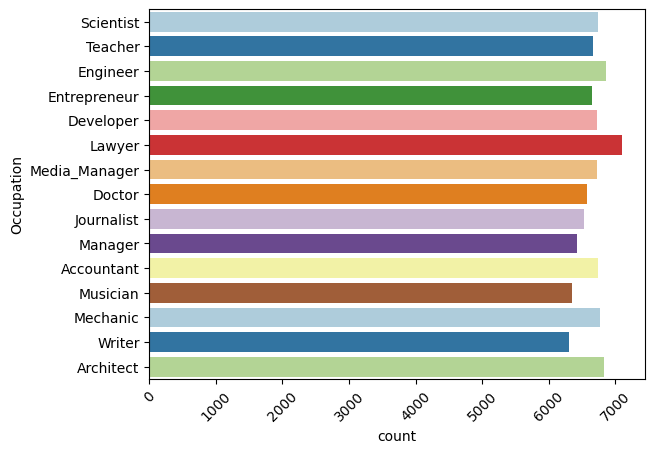

In [186]:
sns.countplot(data['Occupation'],palette="Paired");
plt.xticks(rotation=45);

In [187]:
data["Credit_Score"].value_counts()

Standard    53174
Poor        28998
Good        17828
Name: Credit_Score, dtype: int64

<ipython-input-188-17a99c65555c>:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




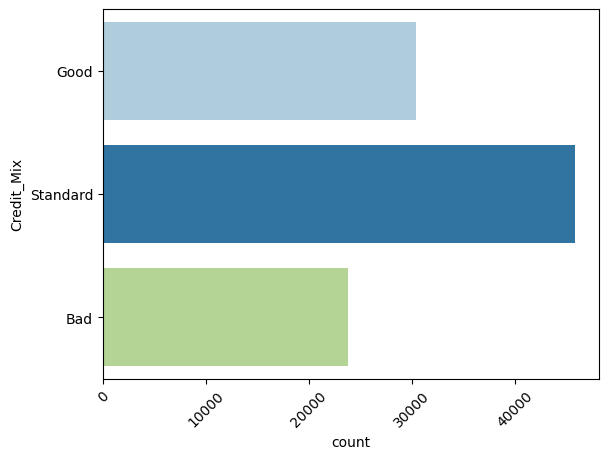

In [188]:
sns.countplot(data['Credit_Mix'],palette="Paired");
plt.xticks(rotation=45);

In [189]:
fig = px.box(data,
             x="Credit_Score",
             y="Annual_Income",
             color="Credit_Score",
             title="Credit Scores Based on Annual Income",
             color_discrete_map={'Poor':'red',
                                 'Standard':'purple',
                                 'Good':'pink'})
fig.update_traces(quartilemethod="exclusive")
fig.show()

In [190]:
categorical_features = ['Name', 'Occupation', 'Type_of_Loan', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Score']  # Update categorical features
for feature in categorical_features:
    print(data[feature].value_counts())

Jessicad              48
Langep                48
Stevex                48
Vaughanl              40
Ronald Groverk        40
                      ..
Breidthardtj           8
Sven Egenterx          8
Antonella Ciancioc     8
Valentina Zan          8
Nicks                  8
Name: Name, Length: 10128, dtype: int64
Lawyer           7096
Engineer         6864
Architect        6824
Mechanic         6776
Scientist        6744
Accountant       6744
Developer        6720
Media_Manager    6720
Teacher          6672
Entrepreneur     6648
Doctor           6568
Journalist       6536
Manager          6432
Musician         6352
Writer           6304
Name: Occupation, dtype: int64
No Data                                                                                                                               11408
Not Specified                                                                                                                          1408
Credit-Builder Loan                         

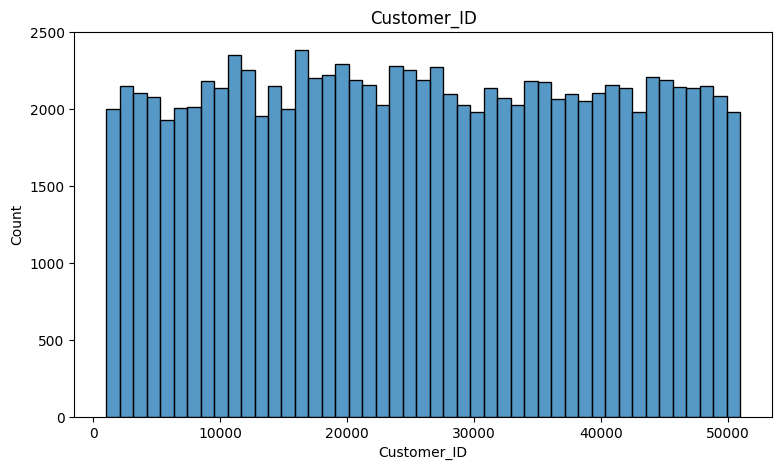

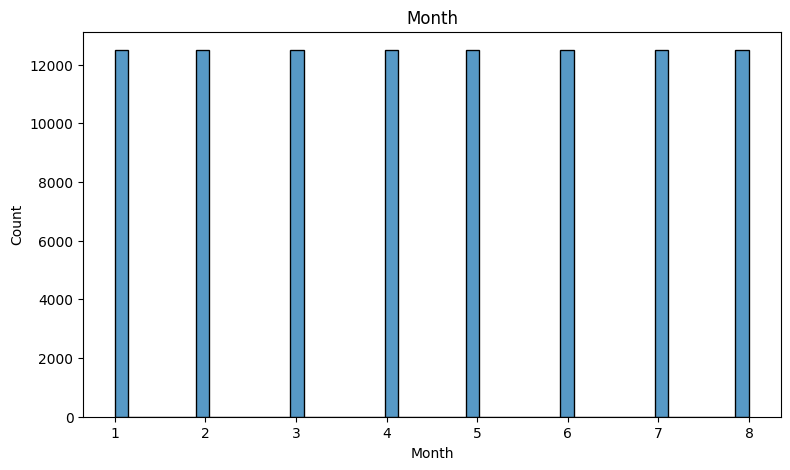

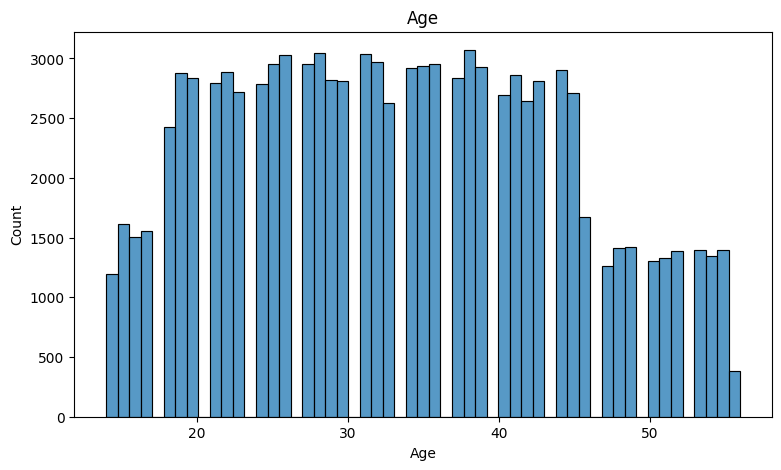

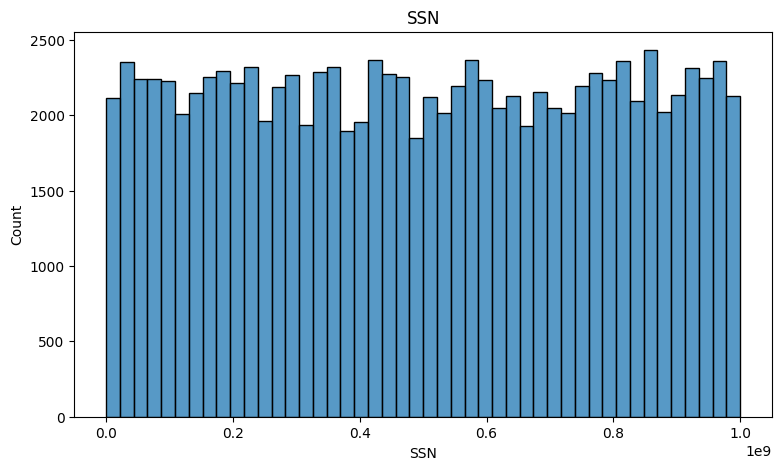

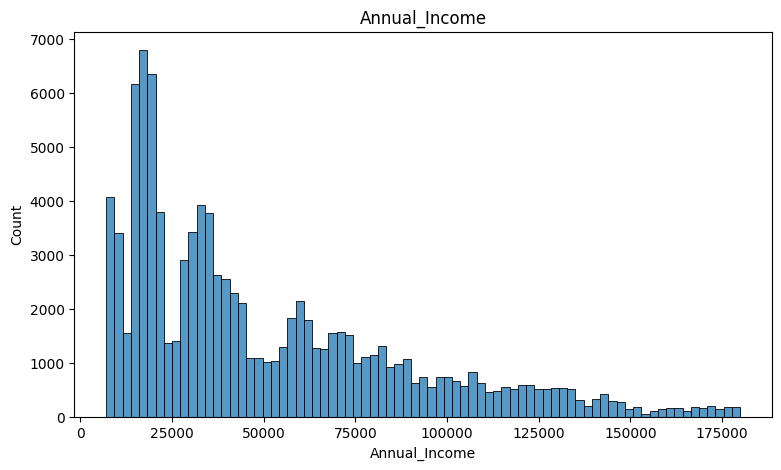

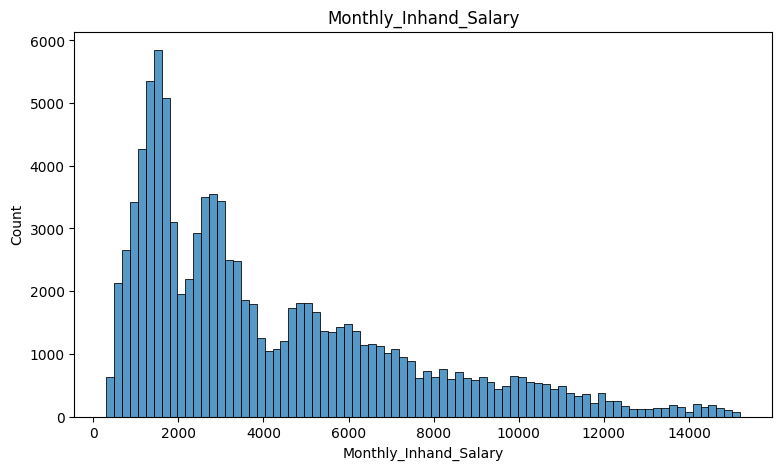

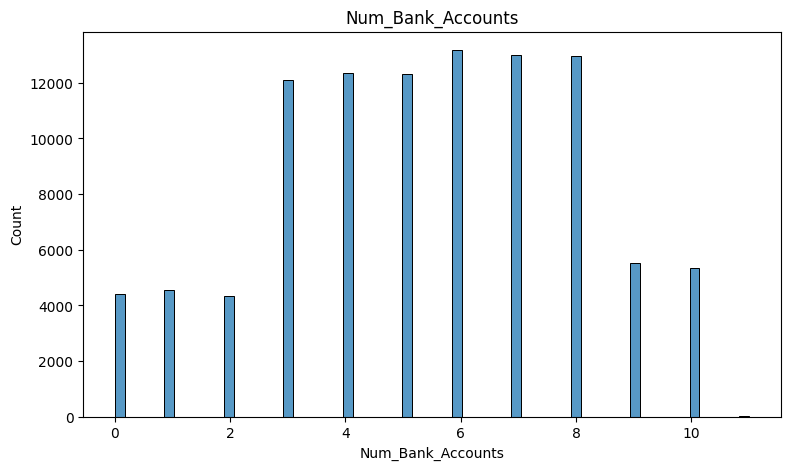

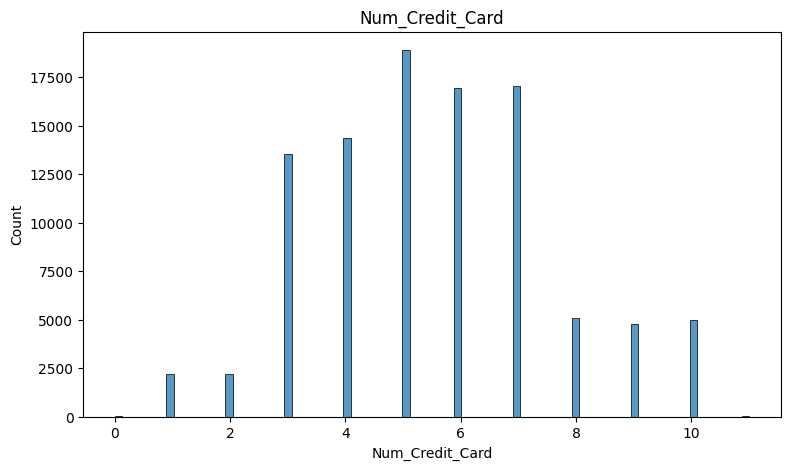

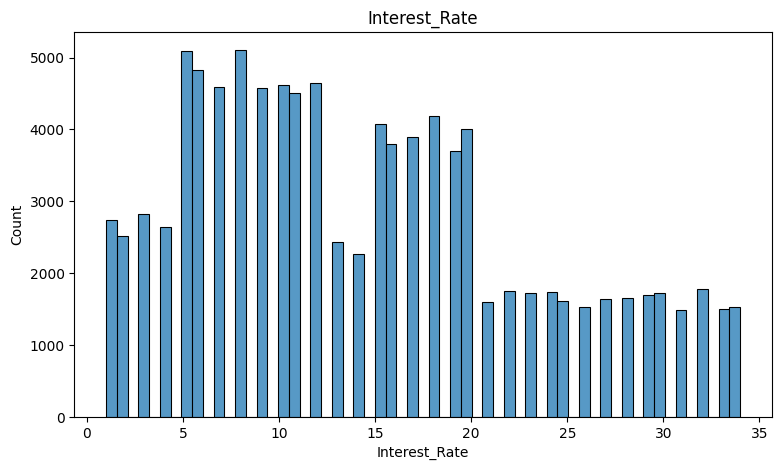

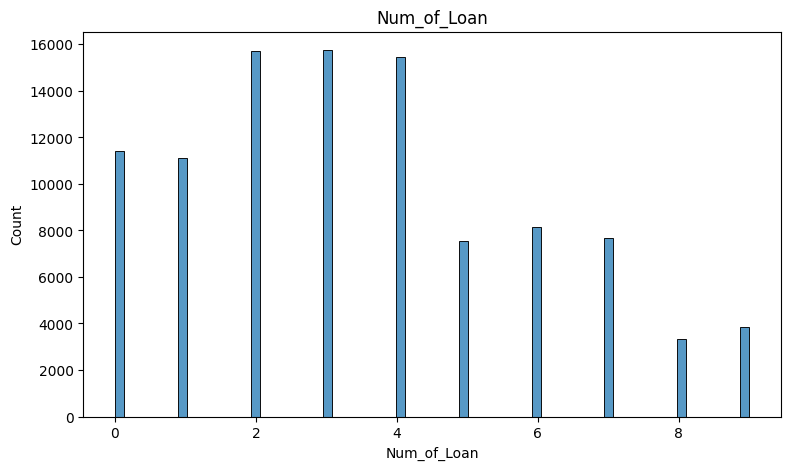

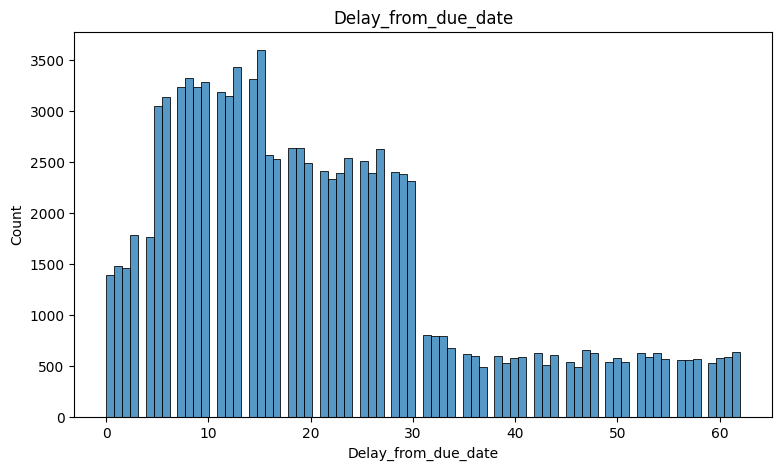

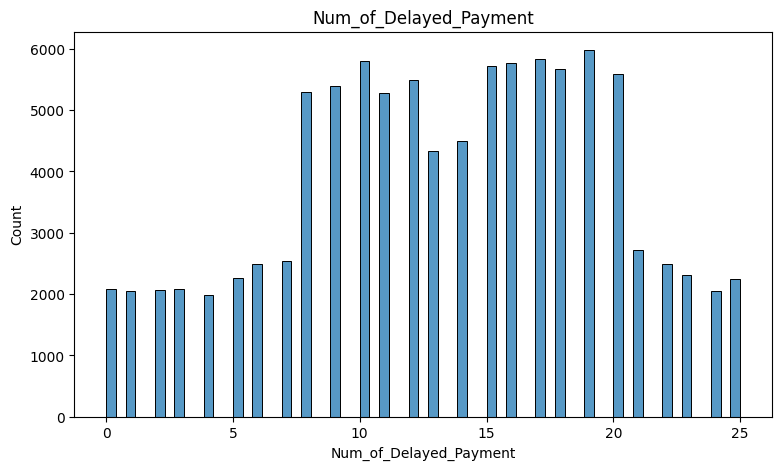

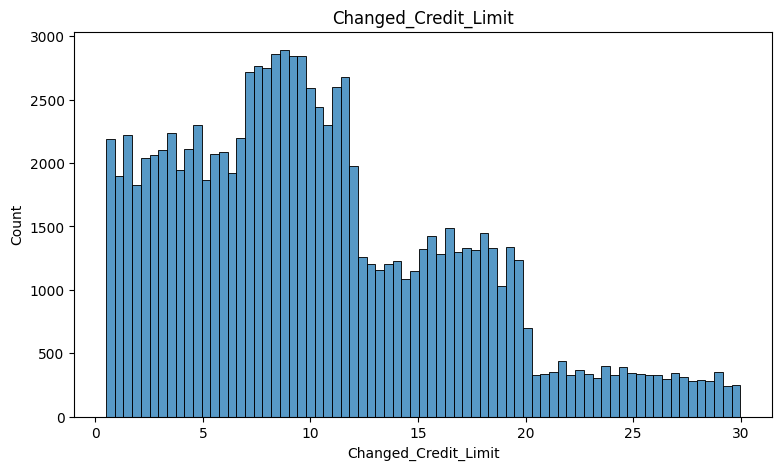

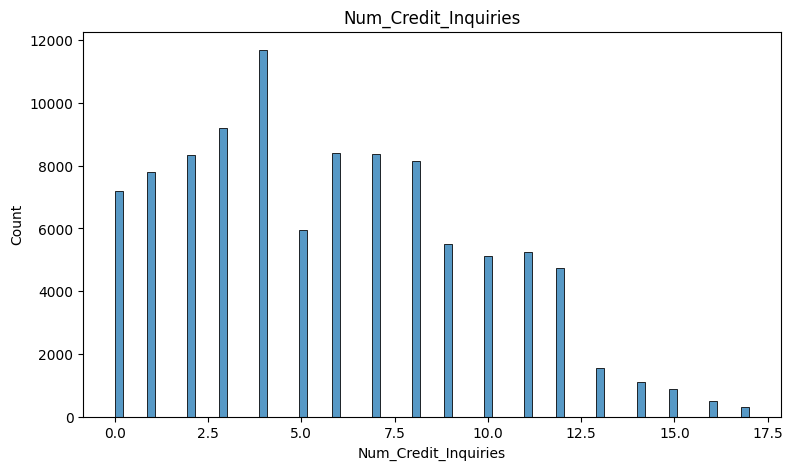

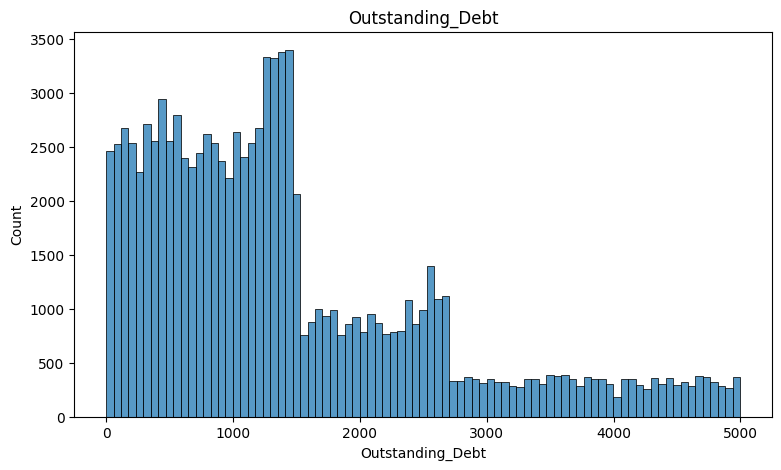

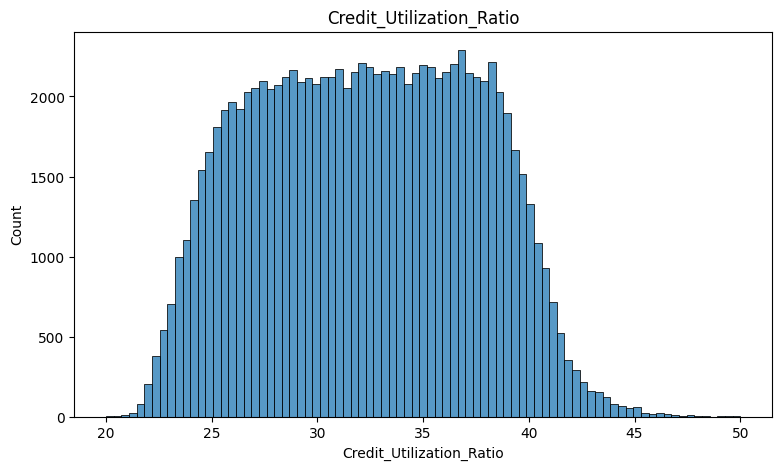

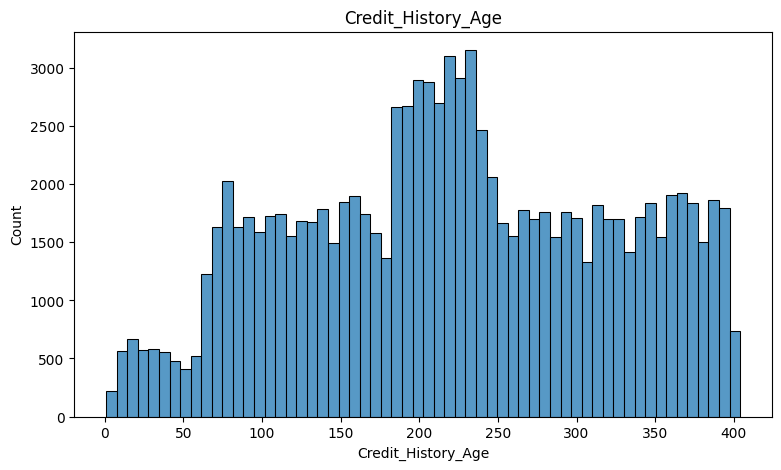

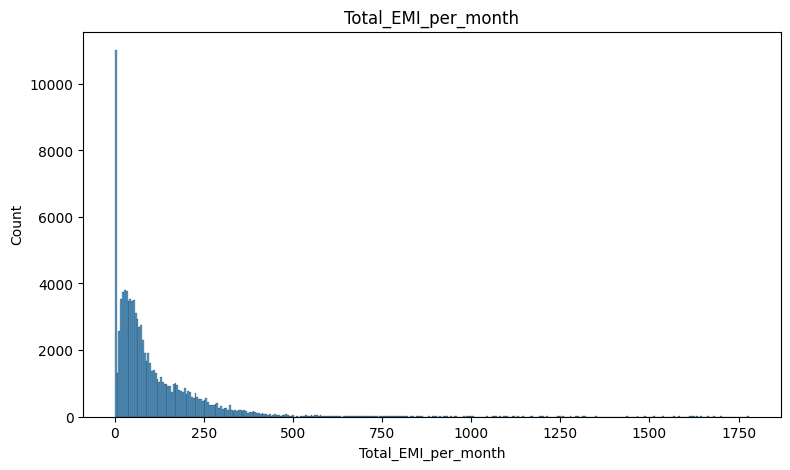

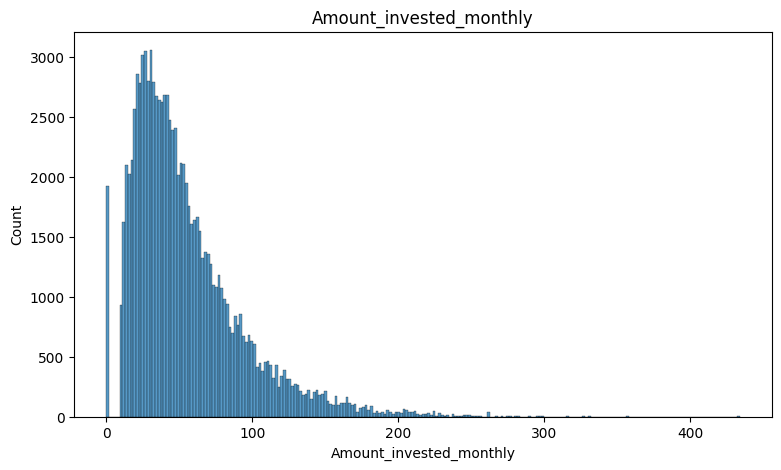

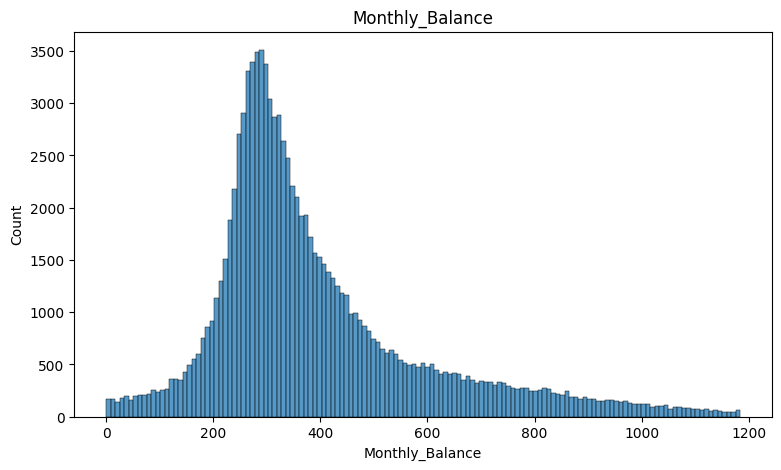

In [191]:
numerical_features = [col for col in data.columns if data[col].dtype != 'object']  # Identify numerical features
for feature in numerical_features:
    plt.figure(figsize=(9,5))
    sns.histplot(data[feature])
    plt.title(feature)
    plt.show()

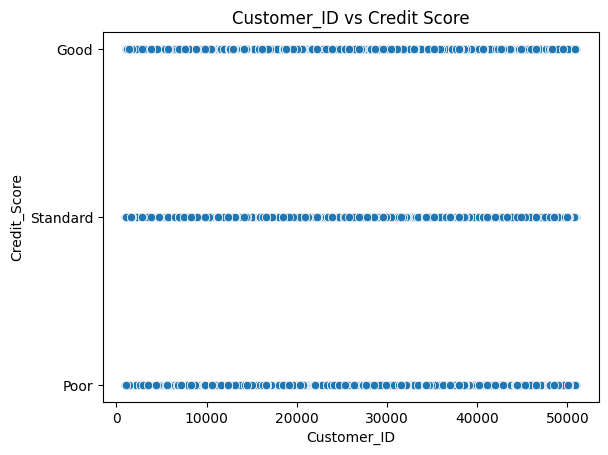

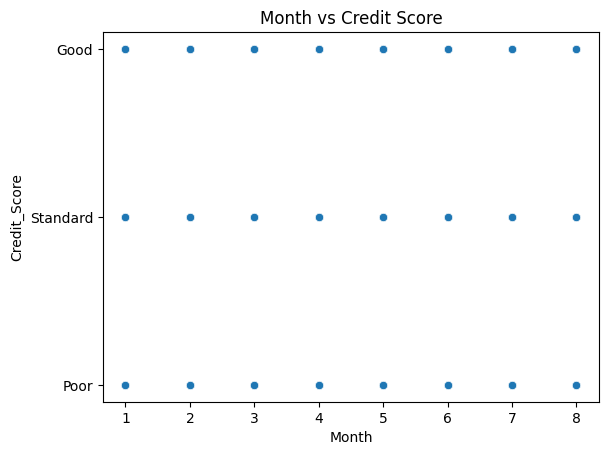

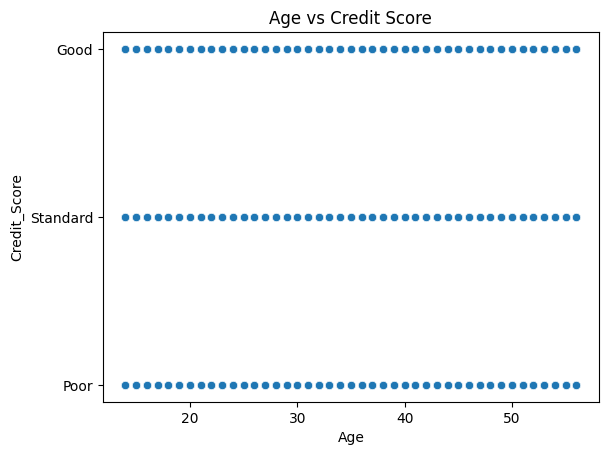

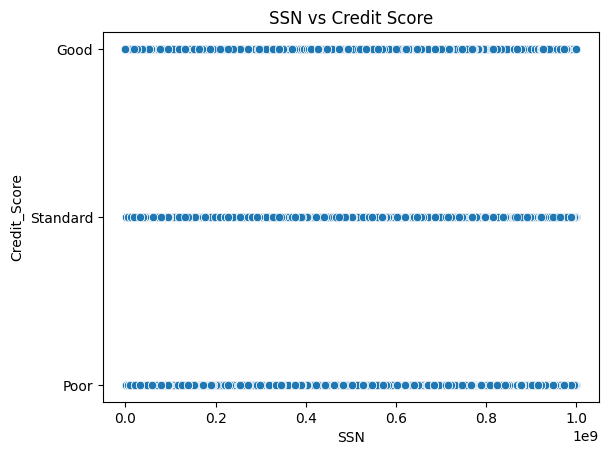

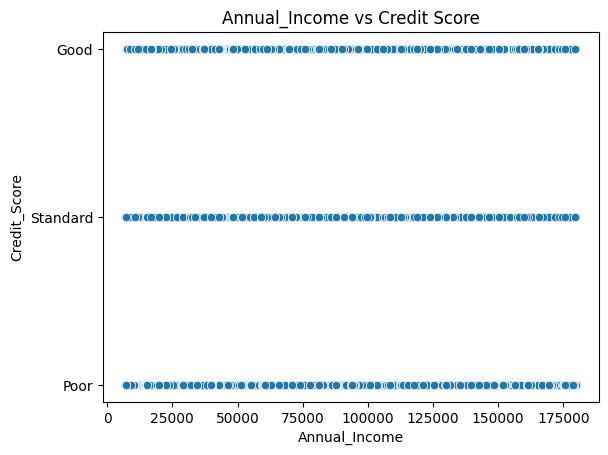

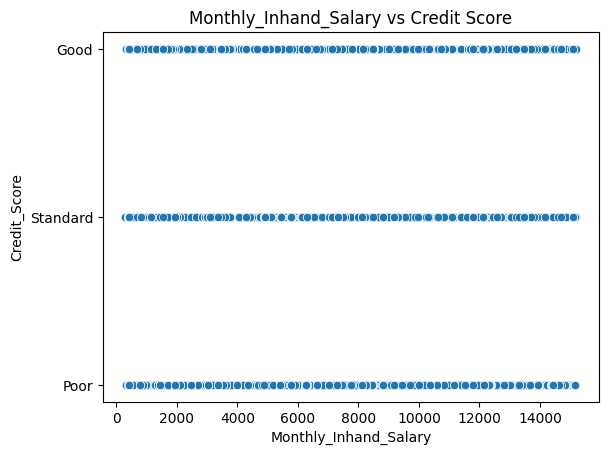

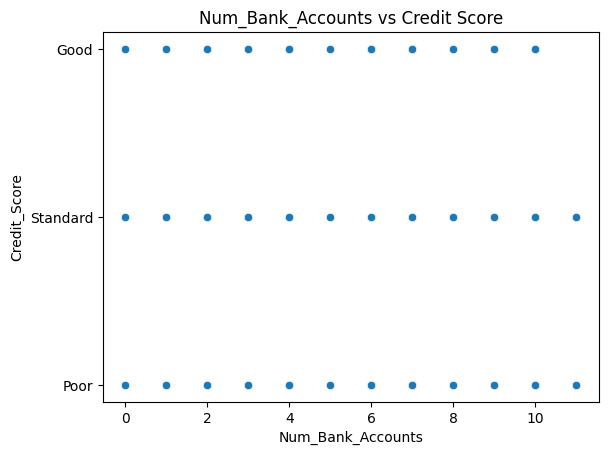

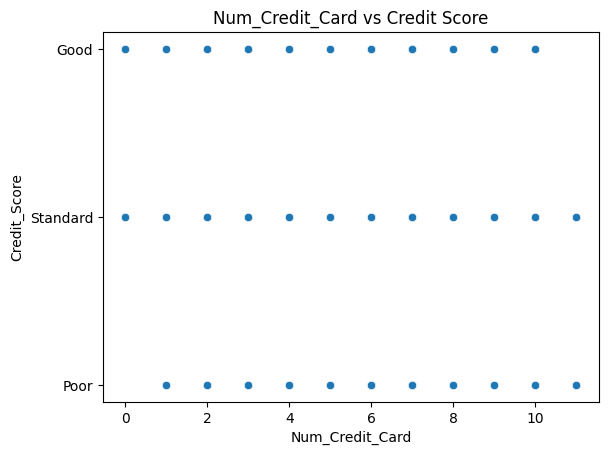

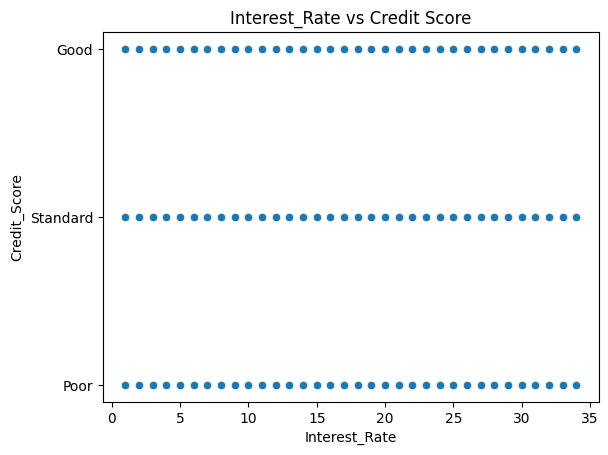

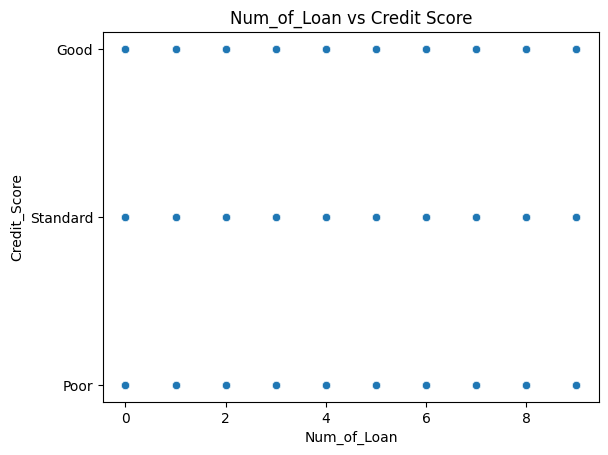

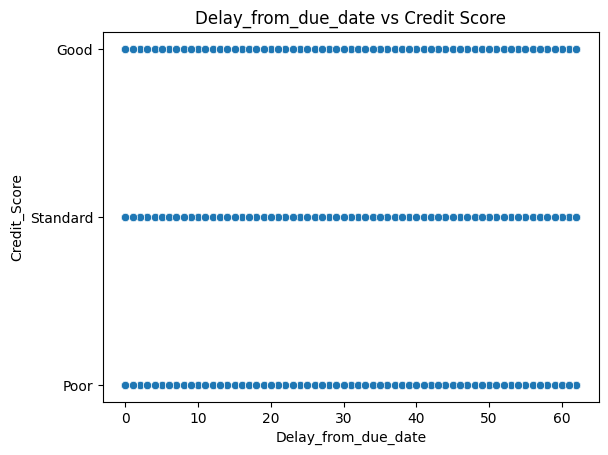

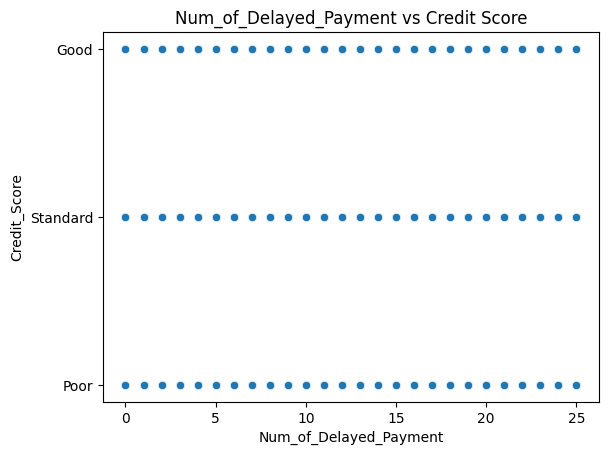

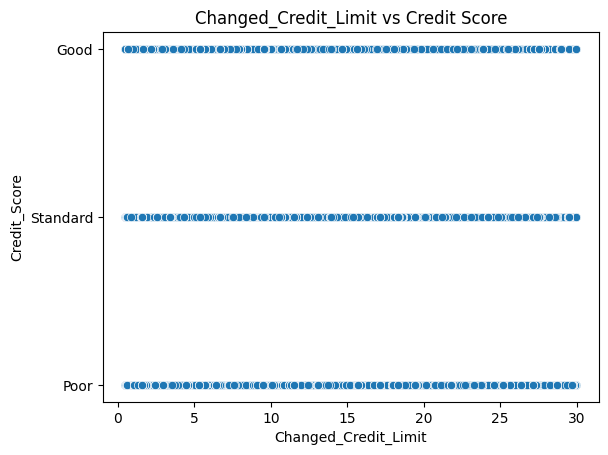

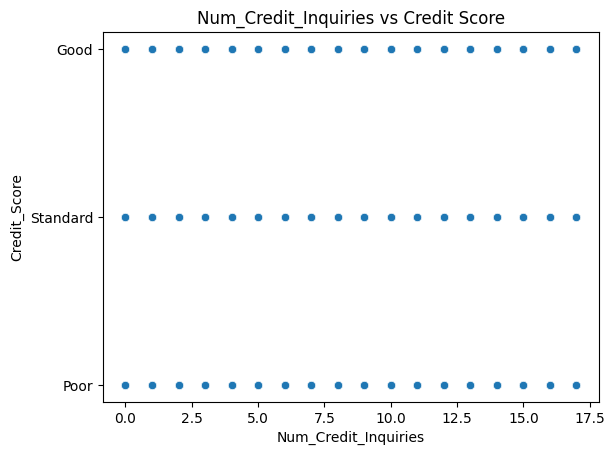

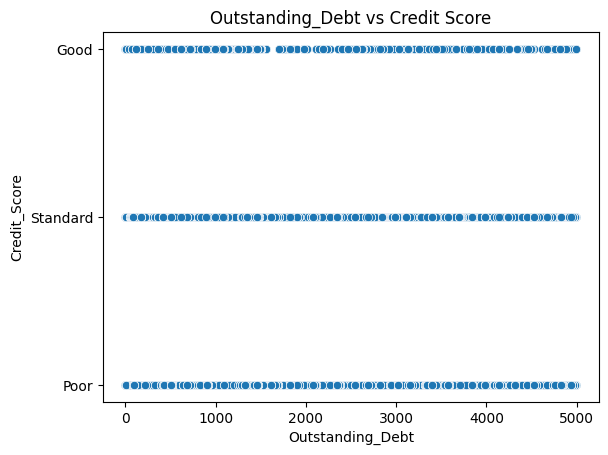

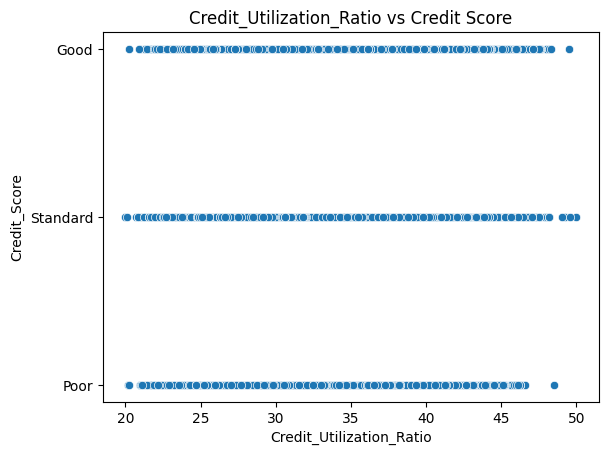

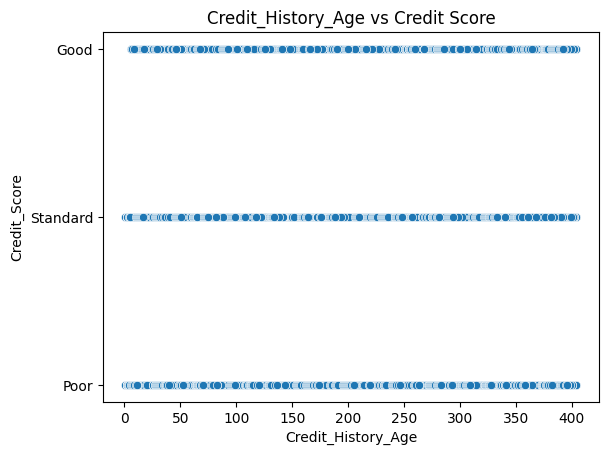

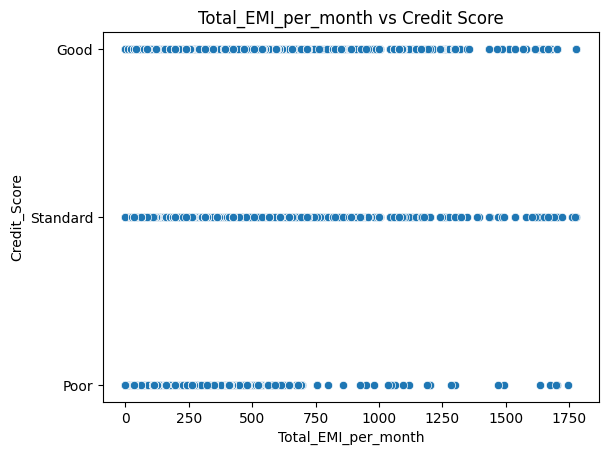

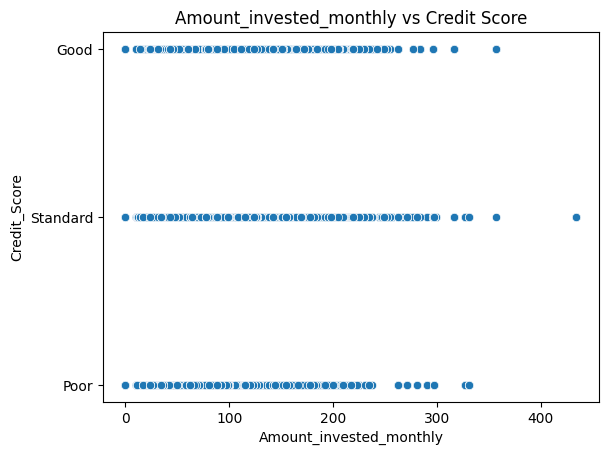

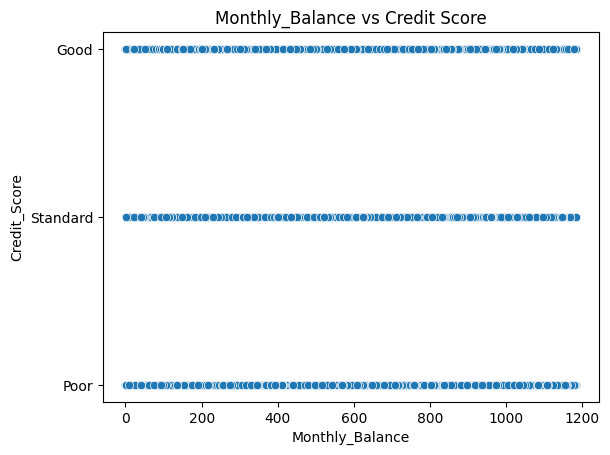

In [192]:
for feature in numerical_features:
    sns.scatterplot(x=feature, y='Credit_Score', data=data)
    plt.title(f'{feature} vs Credit Score')
    plt.show()

In [193]:
# Data preprocessing

# Separate features (X) and target variable (y)
X = data.drop('Credit_Score', axis=1)
y = data['Credit_Score']


In [194]:
categorical_features

['Name',
 'Occupation',
 'Type_of_Loan',
 'Payment_of_Min_Amount',
 'Payment_Behaviour',
 'Credit_Score']

In [195]:
categorical_features.remove('Credit_Score')

**Model building**

In [196]:
# Encode categorical features using label encoding
le = LabelEncoder()
for feature in categorical_features:
    X[feature] = le.fit_transform(X[feature])


In [197]:
# Find the non-numerical columns
non_numerical_cols = X.select_dtypes(include=["object"]).columns

# Convert the non-numerical columns to numerical data
for col in non_numerical_cols:
    X[col] = pd.to_numeric(X[col], errors="coerce")

In [198]:

# Scale numerical features (consider normalization or standardization)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1047: RuntimeWarning:

invalid value encountered in divide

/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1052: RuntimeWarning:

invalid value encountered in divide

/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1072: RuntimeWarning:

invalid value encountered in divide



In [205]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

models = [
    ('Logistic Regression', LogisticRegression()),
    ('Random Forest', RandomForestClassifier(n_estimators=100)),  # Add Random Forest with 100 trees
    ('Gradient Boosting', GradientBoostingClassifier())
]


**Model Accuracy**

Logistic Regression:
Accuracy: 0.64085
Precision: 0.64085
Recall: 0.64085
F1-score: 0.64085
Model Accuracy (rounded): % 64.0
-----


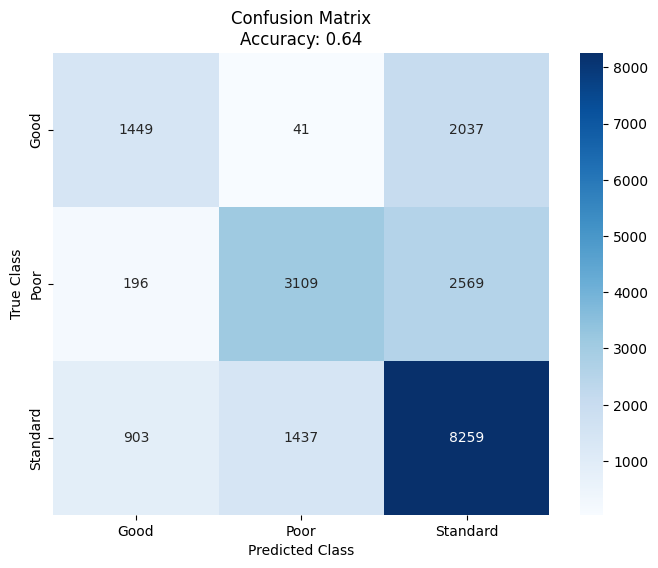

Random Forest:
Accuracy: 0.83555
Precision: 0.83555
Recall: 0.83555
F1-score: 0.8355500000000001
Model Accuracy (rounded): % 84.0
-----


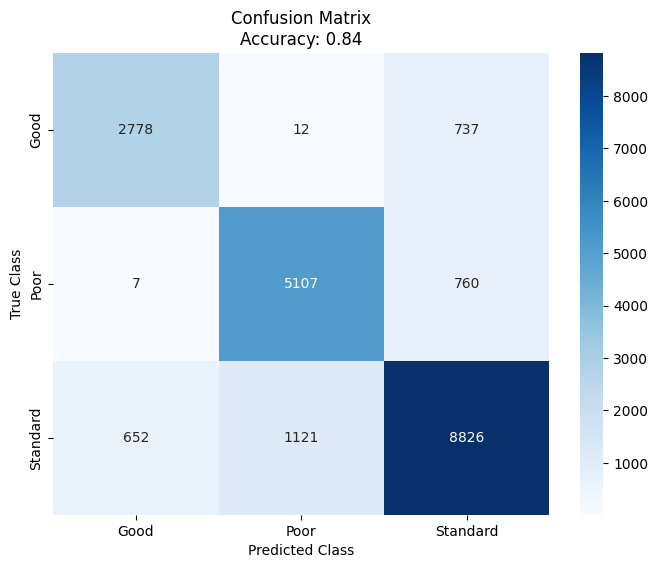

Gradient Boosting:
Accuracy: 0.69995
Precision: 0.69995
Recall: 0.69995
F1-score: 0.69995
Model Accuracy (rounded): % 70.0
-----


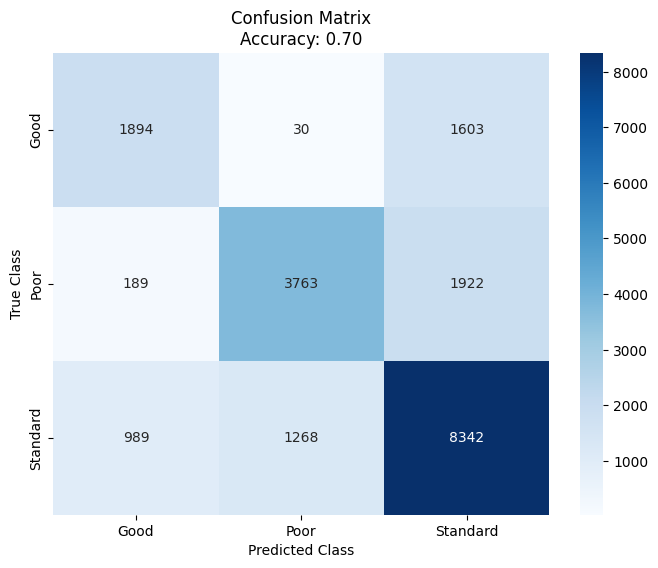

In [206]:

from sklearn.metrics import confusion_matrix

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred,average='micro')
    recall = recall_score(y_test, y_pred,average='micro')
    f1 = f1_score(y_test, y_pred,average='micro')

    rounded_accuracy = round(accuracy, 2)
    print(f'{name}:')
    print('Accuracy:', accuracy)
    print('Precision:', precision)
    print('Recall:', recall)
    print('F1-score:', f1)
    print("Model Accuracy (rounded):", "%", 100 * rounded_accuracy)
    print('-----')


    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
    plt.xlabel("Predicted Class")
    plt.ylabel("True Class")
    plt.title(f"Confusion Matrix\nAccuracy: {accuracy:.2f}")
    plt.show()

It is evident from the given data that the Random Forest Classifier model has an accuracy of about 84% in predicting classifications.